# <font color='orange'> Quantum Machine Learning project

# <font color='orange'> ~~~ The effect of data encoding on the expressive power of variational quantum machine learning models ~~~
# <font color='orange'> Yaniv Hajaj, Asaf Ben Or, Almog Sharoni and Shir Cohen 



# <font color='red'> this code Reproduce figure 3

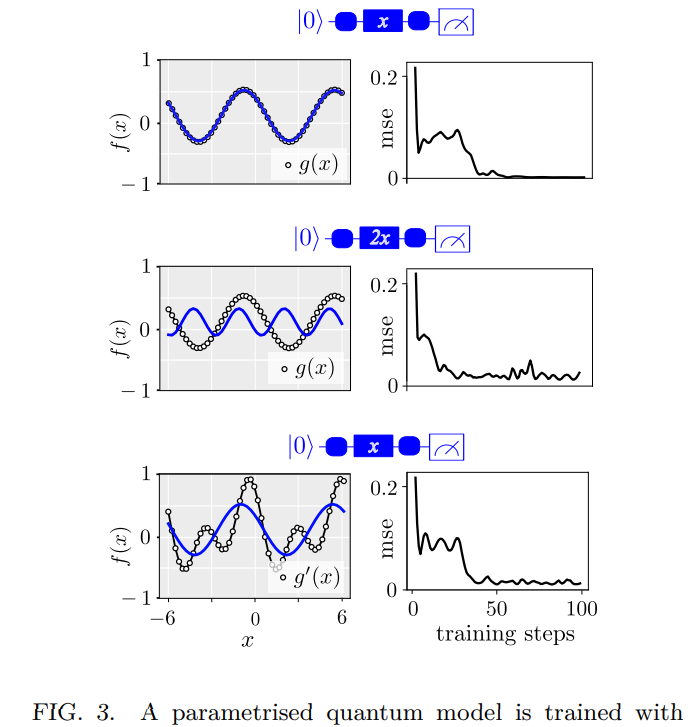

# Feeding in the input x as is (top row) [scale=1, degree=1], the quantum model easily fits the target of degree 1. 
# Rescaling the inputs x → 2x causes a frequency mismatch, and the model cannot learn the target any more (middle row) [scale=2, degree=1].
# However, even with the correct scaling, the variational circuit cannot fit the target function of degree 2 (bottom row) [scale=1, degree=2].


In [26]:
%matplotlib inline
!pip install pennylane==0.25.1

import matplotlib.pyplot as plt
import pennylane as qml
from pennylane import numpy as np

np.random.seed(42)

def square_loss(targets, predictions):
    loss = 0
    for t, p in zip(targets, predictions):
        loss = loss + (t - p) ** 2
    loss = loss / len(targets)
    return 0.5*loss

In [30]:
degree = 1 # degree of the target function
scaling = 1 # scaling of the data
coeffs = [0.15 + 0.15j]*degree # coefficients of non-zero frequencies
coeff0 = 0.1 # coefficient of zero frequency

def target_function(x):
    """Generate a truncated Fourier series of degree, where the data gets re-scaled."""
    res = coeff0
    for idx, coeff in enumerate(coeffs):
        exponent = complex(0, scaling*(idx+1)*x)
        conj_coeff = np.conjugate(coeff)
        res += coeff * np.exp(exponent) + conj_coeff * np.exp(-exponent)
    return np.real(res)

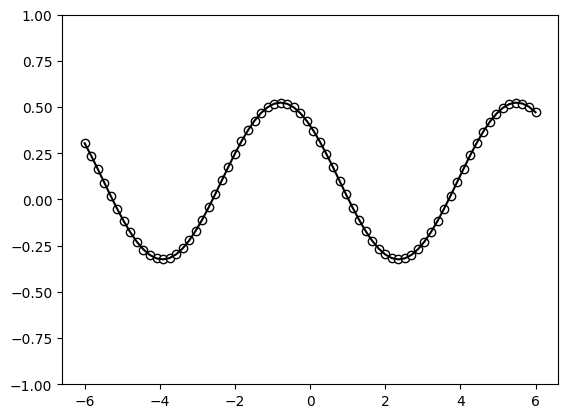

In [31]:
x = np.linspace(-6, 6, 70)
target_y = np.array([target_function(x_) for x_ in x])

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.ylim(-1, 1)
plt.show()

In [34]:
scaling = 1

dev = qml.device('default.qubit', wires=1)

def S(x):
    """Data encoding circuit block."""
    qml.RX(scaling*x, wires=0)

def W(theta):
    """Trainable circuit block."""
    qml.Rot(theta[0], theta[1], theta[2], wires=0)

    
@qml.qnode(dev)
def serial_quantum_model(weights, x=None):
    
    for theta in weights[:-1]:
        W(theta)
        S(x)
        
    # L+1'th unitary
    W(weights[-1])
    
    return qml.expval(qml.PauliZ(wires=0))

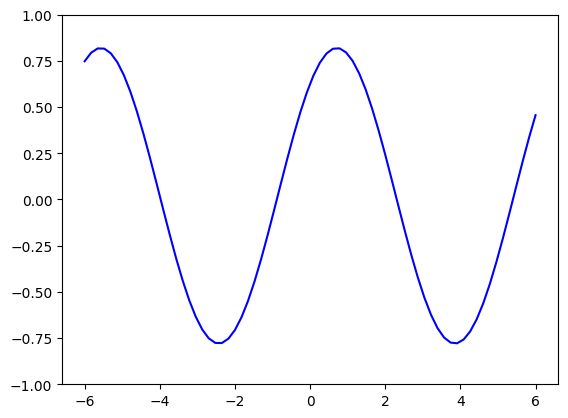

In [35]:
r = 1 # number of times the encoding gets repeated (here equal to the number of layers)
weights = 2*np.pi*np.random.random(size=(r+1, 3)) # some random initial weights

x = np.linspace(-6, 6, 70)
random_quantum_model_y = [serial_quantum_model(weights, x=x_) for x_ in x]

plt.plot(x, random_quantum_model_y, c='blue')
plt.ylim(-1,1)
plt.show()

In [36]:
def cost(weights, x, y):
    predictions = [serial_quantum_model(weights, x=x_) for x_ in x]
    return square_loss(y, predictions)

max_steps = 60
opt = qml.AdamOptimizer(0.3)
batch_size = 25
cst = [cost(weights, x, target_y)]  # initial cost

for step in range(max_steps):

    # Select batch of data
    batch_index = np.random.randint(0, len(x), (batch_size,))
    x_batch = x[batch_index]
    y_batch = target_y[batch_index]

    # Update the weights by one optimizer step
    weights = opt.step(lambda w: cost(w, x_batch, y_batch), weights)

    # Save, and possibly print, the current cost
    c = cost(weights, x, target_y)
    cst.append(c)
    if (step + 1) % 10 == 0:
        print("Cost at step {0:3}: {1}".format(step + 1, c))

Cost at step  10: 0.03993174670928025
Cost at step  20: 0.010712763353944407
Cost at step  30: 0.004376187912918832
Cost at step  40: 0.003538663123563633
Cost at step  50: 0.0009357312488860754
Cost at step  60: 0.00016291076768701454


# <font color='red'> ~~~~~~~ Reproduce figure 3 (top row) [scale=1, degree=1] ~~~~~~~

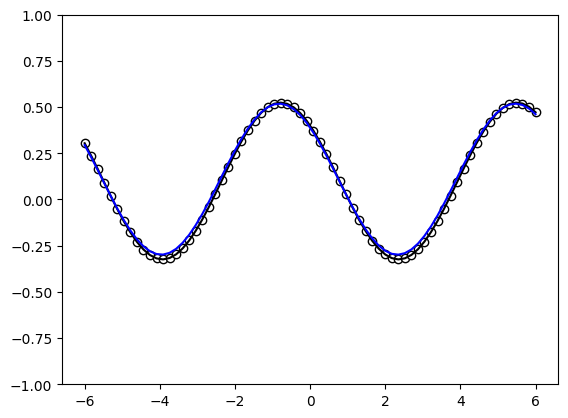

In [37]:
predictions = [serial_quantum_model(weights, x=x_) for x_ in x]

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.plot(x, predictions, c='blue')
plt.ylim(-1,1)
plt.show()

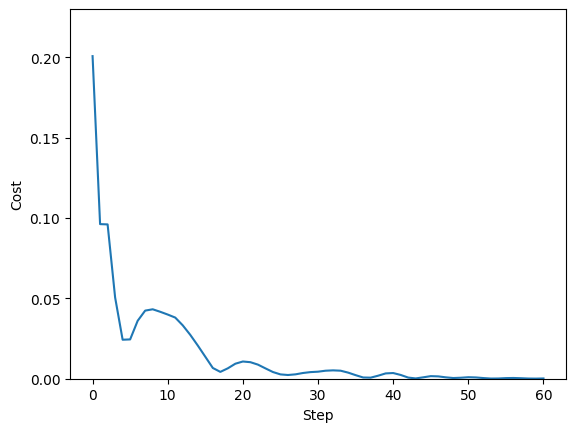

In [38]:
plt.plot(range(len(cst)), cst)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.ylim(0, 0.23)
plt.show()

# <font color='red'> ~~~~~~~ Reproduce figure 3 (top row) [scale=1, degree=1] ~~~~~~~

In [103]:
degree = 1 # degree of the target function
scaling = 2 # scaling of the data
coeffs = [0.15 + 0.15j]*degree # coefficients of non-zero frequencies
coeff0 = 0.1 # coefficient of zero frequency

def target_function(x):
    """Generate a truncated Fourier series of degree, where the data gets re-scaled."""
    res = coeff0
    for idx, coeff in enumerate(coeffs):
        exponent = complex(0, scaling*(idx+1)*x)
        conj_coeff = np.conjugate(coeff)
        res += coeff * np.exp(exponent) + conj_coeff * np.exp(-exponent)
    return np.real(res)

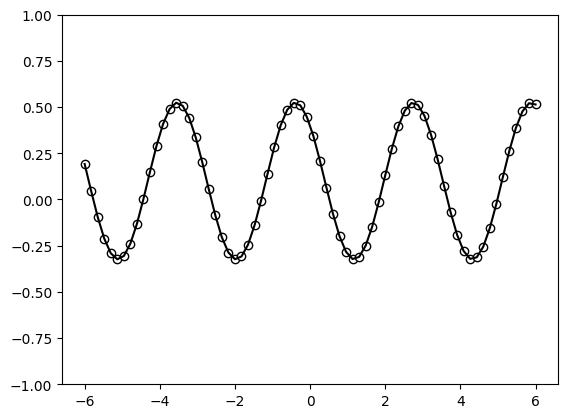

In [104]:
x = np.linspace(-6, 6, 70)
target_y = np.array([target_function(x_) for x_ in x])

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.ylim(-1, 1)
plt.show()

In [105]:
scaling = 1

dev = qml.device('default.qubit', wires=1)

def S(x):
    """Data encoding circuit block."""
    qml.RX(scaling*x, wires=0)

def W(theta):
    """Trainable circuit block."""
    qml.Rot(theta[0], theta[1], theta[2], wires=0)

    
@qml.qnode(dev)
def serial_quantum_model(weights, x=None):
    
    for theta in weights[:-1]:
        W(theta)
        S(x)
        
    # L+1'th unitary
    W(weights[-1])
    
    return qml.expval(qml.PauliZ(wires=0))

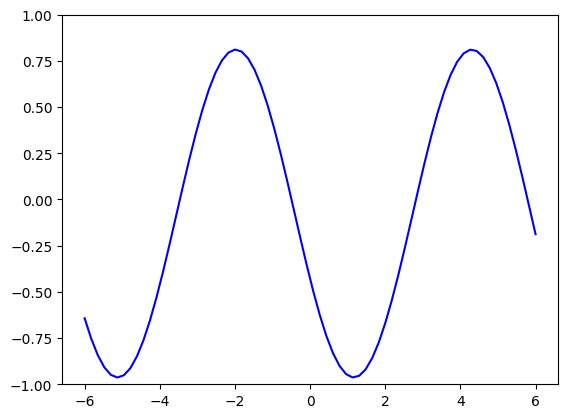

In [106]:
r = 1 # number of times the encoding gets repeated (here equal to the number of layers)
weights = 2*np.pi*np.random.random(size=(r+1, 3)) # some random initial weights

x = np.linspace(-6, 6, 70)
random_quantum_model_y = [serial_quantum_model(weights, x=x_) for x_ in x]

plt.plot(x, random_quantum_model_y, c='blue')
plt.ylim(-1,1)
plt.show()

In [107]:
def cost(weights, x, y):
    predictions = [serial_quantum_model(weights, x=x_) for x_ in x]
    return square_loss(y, predictions)

max_steps = 60
opt = qml.AdamOptimizer(0.3)
batch_size = 25
cst = [cost(weights, x, target_y)]  # initial cost

for step in range(max_steps):

    # Select batch of data
    batch_index = np.random.randint(0, len(x), (batch_size,))
    x_batch = x[batch_index]
    y_batch = target_y[batch_index]

    # Update the weights by one optimizer step
    weights = opt.step(lambda w: cost(w, x_batch, y_batch), weights)

    # Save, and possibly print, the current cost
    c = cost(weights, x, target_y)
    cst.append(c)
    if (step + 1) % 10 == 0:
        print("Cost at step {0:3}: {1}".format(step + 1, c))

Cost at step  10: 0.04823024672961558
Cost at step  20: 0.07374946529597258
Cost at step  30: 0.05940339935986561
Cost at step  40: 0.05810951273587111
Cost at step  50: 0.047001793765786365
Cost at step  60: 0.04990167116479168


# <font color='red'> ~~~~~~~ Reproduce figure 3 (middle row) [scale=2, degree=1] ~~~~~~~

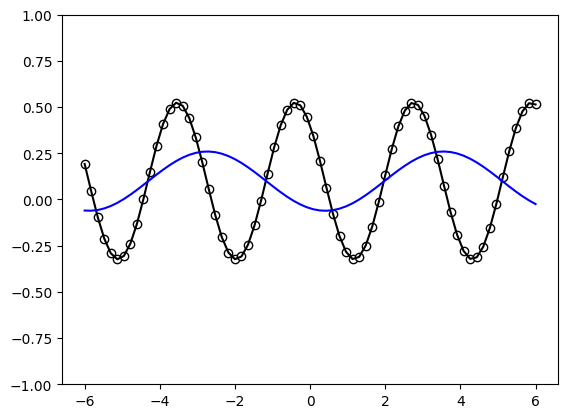

In [108]:
predictions = [serial_quantum_model(weights, x=x_) for x_ in x]

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.plot(x, predictions, c='blue')
plt.ylim(-1,1)
plt.show()

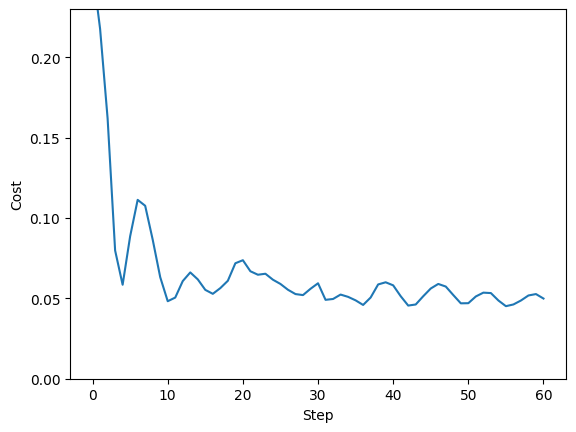

In [109]:
plt.plot(range(len(cst)), cst)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.ylim(0, 0.23)
plt.show()

# <font color='red'> ~~~~~~~ Reproduce figure 3 (middle row) [scale=2, degree=1] ~~~~~~~

In [117]:
degree = 2 # degree of the target function
scaling = 1 # scaling of the data
coeffs = [0.15 + 0.15j]*degree # coefficients of non-zero frequencies
coeff0 = 0.1 # coefficient of zero frequency

def target_function(x):
    """Generate a truncated Fourier series of degree, where the data gets re-scaled."""
    res = coeff0
    for idx, coeff in enumerate(coeffs):
        exponent = complex(0, scaling*(idx+1)*x)
        conj_coeff = np.conjugate(coeff)
        res += coeff * np.exp(exponent) + conj_coeff * np.exp(-exponent)
    return np.real(res)

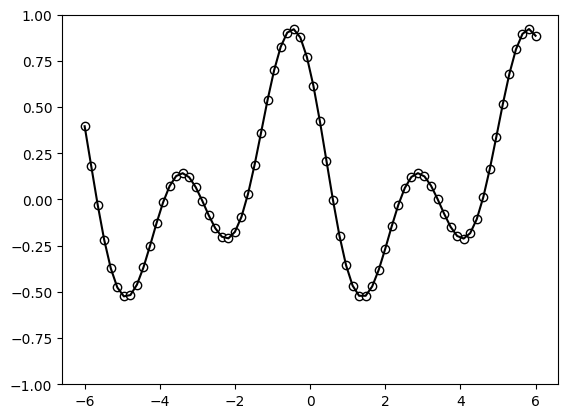

In [118]:
x = np.linspace(-6, 6, 70)
target_y = np.array([target_function(x_) for x_ in x])

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.ylim(-1, 1)
plt.show()

In [119]:
scaling = 1

dev = qml.device('default.qubit', wires=1)

def S(x):
    """Data encoding circuit block."""
    qml.RX(scaling*x, wires=0)

def W(theta):
    """Trainable circuit block."""
    qml.Rot(theta[0], theta[1], theta[2], wires=0)

    
@qml.qnode(dev)
def serial_quantum_model(weights, x=None):
    
    for theta in weights[:-1]:
        W(theta)
        S(x)
        
    # L+1'th unitary
    W(weights[-1])
    
    return qml.expval(qml.PauliZ(wires=0))

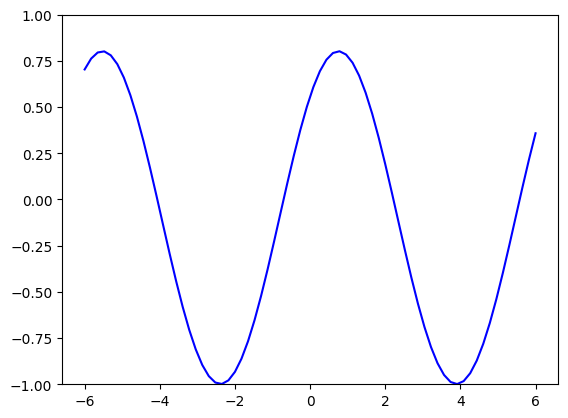

In [120]:
r = 1 # number of times the encoding gets repeated (here equal to the number of layers)
weights = 2*np.pi*np.random.random(size=(r+1, 3)) # some random initial weights

x = np.linspace(-6, 6, 70)
random_quantum_model_y = [serial_quantum_model(weights, x=x_) for x_ in x]

plt.plot(x, random_quantum_model_y, c='blue')
plt.ylim(-1,1)
plt.show()

In [121]:
def cost(weights, x, y):
    predictions = [serial_quantum_model(weights, x=x_) for x_ in x]
    return square_loss(y, predictions)

max_steps = 60
opt = qml.AdamOptimizer(0.3)
batch_size = 25
cst = [cost(weights, x, target_y)]  # initial cost

for step in range(max_steps):

    # Select batch of data
    batch_index = np.random.randint(0, len(x), (batch_size,))
    x_batch = x[batch_index]
    y_batch = target_y[batch_index]

    # Update the weights by one optimizer step
    weights = opt.step(lambda w: cost(w, x_batch, y_batch), weights)

    # Save, and possibly print, the current cost
    c = cost(weights, x, target_y)
    cst.append(c)
    if (step + 1) % 10 == 0:
        print("Cost at step {0:3}: {1}".format(step + 1, c))

Cost at step  10: 0.07732473643967508
Cost at step  20: 0.05874185139141797
Cost at step  30: 0.05285002033257135
Cost at step  40: 0.04676007271297736
Cost at step  50: 0.04960282803367827
Cost at step  60: 0.04939478537960638


# <font color='red'> ~~~~~~~ Reproduce figure 3 (bottom row) [scale=1, degree=2] ~~~~~~~

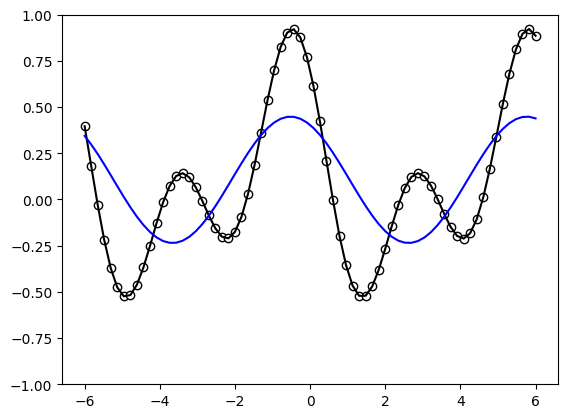

In [122]:
predictions = [serial_quantum_model(weights, x=x_) for x_ in x]

plt.plot(x, target_y, c='black')
plt.scatter(x, target_y, facecolor='white', edgecolor='black')
plt.plot(x, predictions, c='blue')
plt.ylim(-1,1)
plt.show()

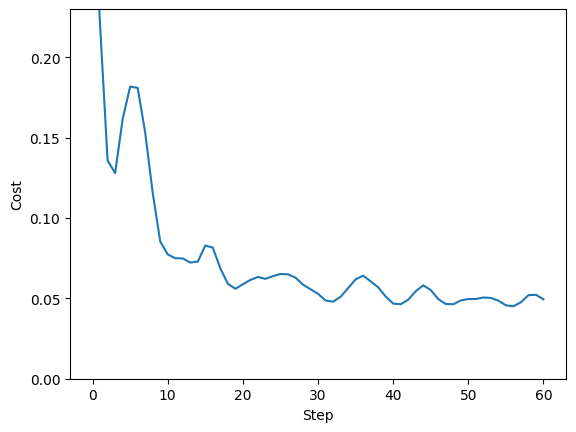

In [123]:
plt.plot(range(len(cst)), cst)
plt.ylabel("Cost")
plt.xlabel("Step")
plt.ylim(0, 0.23)
plt.show()

# <font color='red'> ~~~~~~~ Reproduce figure 3 (bottom row) [scale=1, degree=2] ~~~~~~~